In [1]:
import camber

In [2]:
spark = camber.spark.connect(worker_size="XSMALL")

Output()

# Necessary Imports

In [3]:
import pyspark

import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt

# Load the dataset

In [4]:
DATA_PATH = "s3a://camber-spark-bkt/ciber-catts/shared-data/titanic"

In [5]:
train_data = f"{DATA_PATH}/train.csv"
test_data = f"{DATA_PATH}/test.csv"

In [6]:
df = spark.read.format("csv").option("inferSchema", "true").option("header", "true") \
  .option("sep", ",") \
  .load(train_data)

NOTE:


`df = spark.read.format("csv")`: This line initiates the process of reading a CSV file into a DataFrame. The spark.read method is used to create a DataFrameReader, which provides various methods for reading data from different formats. In this case, we specify the format as "csv" to read a CSV file.

`.option("inferSchema", "true")`: This line sets the option for inferring the schema of the DataFrame from the CSV file. When set to "true", Spark will automatically infer the data types of the columns based on the contents of the CSV file.

`.option("header", "true")`: This line sets the option to treat the first row of the CSV file as the header. By setting this option to "true", Spark will use the first row to determine the column names of the DataFrame.

`.option("sep", ",")`: This line sets the option for the separator used in the CSV file. Here, the separator is set to a comma (",") to indicate that the CSV file is comma-separated.

`.load(train_data)`: This line specifies the path of the CSV file to be loaded into the DataFrame. The train_data variable should contain the file path or the URL of the CSV file.

# Dataset Overview

In [7]:
print('Schema overview')
df.printSchema()

Schema overview
root
 |-- PassengerId: integer (nullable = true)
 |-- Survived: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)



In [8]:
print('Columns overview')
pd.DataFrame(df.dtypes, columns = ['Column Name','Data type'])

Columns overview


,Column Name,Data type
0,PassengerId,int
1,Survived,int
2,Pclass,int
3,Name,string
4,Sex,string
5,Age,double
6,SibSp,int
7,Parch,int
8,Ticket,string
9,Fare,double


# Converting Spark DataFrame to list of dictionaries

In [9]:
# Convert Spark DataFrame to list of dictionaries
data_dict_list = []

# Collect rows from Spark DataFrame and create dictionaries
for row in df.collect():
    row_dict = {}
    for col in df.columns:
        row_dict[col] = row[col]
    data_dict_list.append(row_dict)

In [10]:
# Cheeck out the list of dictionaries (upto 2 elements)
for row_dict in data_dict_list[:2]:
    print(row_dict)

{'PassengerId': 1, 'Survived': 0, 'Pclass': 3, 'Name': 'Braund, Mr. Owen Harris', 'Sex': 'male', 'Age': 22.0, 'SibSp': 1, 'Parch': 0, 'Ticket': 'A/5 21171', 'Fare': 7.25, 'Cabin': None, 'Embarked': 'S'}
{'PassengerId': 2, 'Survived': 1, 'Pclass': 1, 'Name': 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)', 'Sex': 'female', 'Age': 38.0, 'SibSp': 1, 'Parch': 0, 'Ticket': 'PC 17599', 'Fare': 71.2833, 'Cabin': 'C85', 'Embarked': 'C'}


In [11]:
data_dict_list[:2]

[{'PassengerId': 1,
  'Survived': 0,
  'Pclass': 3,
  'Name': 'Braund, Mr. Owen Harris',
  'Sex': 'male',
  'Age': 22.0,
  'SibSp': 1,
  'Parch': 0,
  'Ticket': 'A/5 21171',
  'Fare': 7.25,
  'Cabin': None,
  'Embarked': 'S'},
 {'PassengerId': 2,
  'Survived': 1,
  'Pclass': 1,
  'Name': 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
  'Sex': 'female',
  'Age': 38.0,
  'SibSp': 1,
  'Parch': 0,
  'Ticket': 'PC 17599',
  'Fare': 71.2833,
  'Cabin': 'C85',
  'Embarked': 'C'}]

# Identifying null values per key

In [12]:
def count_null_values(list_dicts):

    # Initialize null value count dictionary
    null_value_count = {col: 0 for col in df.columns}

    # Iterate over the list of dictionaries
    for row_dict in data_dict_list:
        # Iterate over the keys in each dictionary
        for key, value in row_dict.items():
            # Check for null values and update the null value count
            if value is None:
                null_value_count[key] += 1

    # Display the null value count per key
    for col, count in null_value_count.items():
        print(f"Key '{col}' has {count} null value(s)")


In [13]:
count_null_values(list_dicts = data_dict_list)

Key 'PassengerId' has 0 null value(s)
Key 'Survived' has 0 null value(s)
Key 'Pclass' has 0 null value(s)
Key 'Name' has 0 null value(s)
Key 'Sex' has 0 null value(s)
Key 'Age' has 177 null value(s)
Key 'SibSp' has 0 null value(s)
Key 'Parch' has 0 null value(s)
Key 'Ticket' has 0 null value(s)
Key 'Fare' has 0 null value(s)
Key 'Cabin' has 687 null value(s)
Key 'Embarked' has 2 null value(s)


## Exercise 1: Write the code to fill the missing values of 'Cabin' with 'Unknown'.

In [14]:
# Define the value to fill nulls
fill_value = "Unknown"

# Iterate over the list of dictionaries
for row_dict in data_dict_list:
    # Iterate over the keys in each dictionary
    for key, value in row_dict.items():
        # Check for null values and update the null value count
        if key == 'Cabin' and value is None:
            row_dict[key] = fill_value

In [15]:
count_null_values(list_dicts = data_dict_list)

Key 'PassengerId' has 0 null value(s)
Key 'Survived' has 0 null value(s)
Key 'Pclass' has 0 null value(s)
Key 'Name' has 0 null value(s)
Key 'Sex' has 0 null value(s)
Key 'Age' has 177 null value(s)
Key 'SibSp' has 0 null value(s)
Key 'Parch' has 0 null value(s)
Key 'Ticket' has 0 null value(s)
Key 'Fare' has 0 null value(s)
Key 'Cabin' has 0 null value(s)
Key 'Embarked' has 2 null value(s)


## Exercise 2: Write the code to identify the unique cabins and their corresponding counts. Then, sort the results in descending order based on the counts. Print the top 10 results.

In [16]:
# Initialize the dictionary for storing unique cabins and counts
unique_cabins = {}

# Iterate over the list of dictionaries
for row_dict in data_dict_list:
    # Iterate over the keys in each dictionary
    for key, value in row_dict.items():
        # Check if the key corresponds to 'Cabin' and the value is not null
        if key == 'Cabin' and value is not None:
            # Update the count for the unique cabin value
            if value in unique_cabins:
                unique_cabins[value] += 1
            else:
                unique_cabins[value] = 1


# Sort the unique cabins and their counts based on counts in descending order
sorted_cabins = sorted(unique_cabins.items(), key=lambda x: x[1], reverse=True)

# Display the unique cabins along with their counts
print("Unique cabins and their counts (sorted by count in descending order):")
for cabin, count in sorted_cabins[:10]:
    print(f"Cabin: {cabin}, Count: {count}")

Unique cabins and their counts (sorted by count in descending order):
Cabin: Unknown, Count: 687
Cabin: G6, Count: 4
Cabin: C23 C25 C27, Count: 4
Cabin: B96 B98, Count: 4
Cabin: F33, Count: 3
Cabin: E101, Count: 3
Cabin: F2, Count: 3
Cabin: D, Count: 3
Cabin: C22 C26, Count: 3
Cabin: C123, Count: 2


## Plot the data distribution of 'Age' 

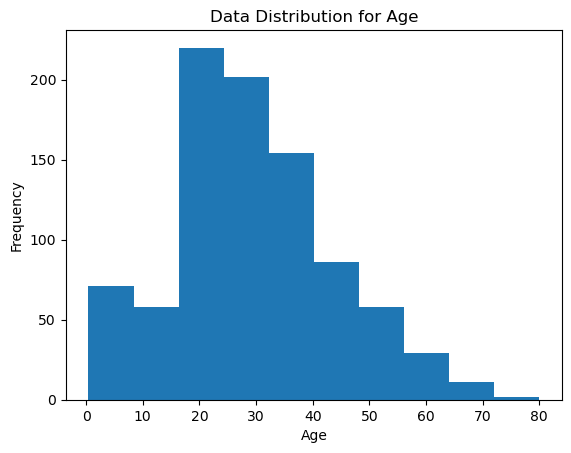

In [17]:
import matplotlib.pyplot as plt

# Create an empty list to store the ages
ages = []

# Iterate over the list of dictionaries
for element in data_dict_list:
    for key, value in element.items():
        # Get the value of the "Age" key
        if key == "Age" and value is not None:
            age = value
    # Append the age to the list
    ages.append(age)

# Plot the data distribution
plt.hist(ages, bins=10)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Data Distribution for Age")
plt.show()

Since the distribution is slightly right-skewed, using the median as a measure of central tendency can be a suitable option. 

## Exercise 3: Replace the missing values of 'Age' with the median 'Age' of the dataset.

In [18]:
# Create an empty list to store the ages
ages = []

# Iterate over the list of dictionaries
for element in data_dict_list:
    for key, value in element.items():
        # Get the value of the "Age" key
        if key == "Age" and value is not None:
            age = value
    # Append the age to the list
    ages.append(age)

In [19]:
median_age = None

# Sort the ages in ascending order
ages.sort()

# Calculate the median
n = len(ages)
if n % 2 == 1:  # odd length
    median_age = ages[n // 2]
else:    # even length
    median_age = (ages[n // 2 - 1] + ages[n // 2]) / 2

# Display the median
print("Median Age:", median_age)

Median Age: 28.0


In [20]:
# Define the value to fill nulls
fill_value = median_age


# Iterate over the list of dictionaries
for row_dict in data_dict_list:
    # Iterate over the keys in each dictionary
    for key, value in row_dict.items():
        # Check for null values and update the null value count
        if key == 'Age' and value is None:
            row_dict[key] = fill_value
           

In [21]:
count_null_values(list_dicts = data_dict_list)

Key 'PassengerId' has 0 null value(s)
Key 'Survived' has 0 null value(s)
Key 'Pclass' has 0 null value(s)
Key 'Name' has 0 null value(s)
Key 'Sex' has 0 null value(s)
Key 'Age' has 0 null value(s)
Key 'SibSp' has 0 null value(s)
Key 'Parch' has 0 null value(s)
Key 'Ticket' has 0 null value(s)
Key 'Fare' has 0 null value(s)
Key 'Cabin' has 0 null value(s)
Key 'Embarked' has 2 null value(s)


## Exercise 4: Write the code to identify the unique values of 'Embarked' and their corresponding counts. Then, sort the results in descending order based on the counts. 

In [31]:
# Initialize the dictionary for storing unique embarks and counts
unique_embarks = {}

# Iterate over the list of dictionaries
for row_dict in data_dict_list:
    # Iterate over the keys in each dictionary
    for key, value in row_dict.items():
        # Check if the key corresponds to 'Embarked' and the value is not null
        if key == 'Embarked':
            # Update the count for the unique Embarked value
            if value in unique_embarks:
                unique_embarks[value] += 1
            else:
                unique_embarks[value] = 1


# Sort the unique embarks and their counts based on counts in descending order
sorted_embarks = sorted(unique_embarks.items(), key=lambda x: x[1], reverse=True)

# Display the unique embarks along with their counts
print("Unique embarks and their counts (sorted by count in descending order):")
for embark, count in sorted_embarks:
    print(f"Embark: {embark}, Count: {count}")

Unique embarks and their counts (sorted by count in descending order):
Embark: S, Count: 644
Embark: C, Count: 168
Embark: Q, Count: 77
Embark: None, Count: 2


## Exercise 5: Write the code to remove from the `data_dict_list` where 'Embarked' is None. 

In [36]:
for i in range(len(data_dict_list)):
    if data_dict_list[i].get('Embarked') is None:
            data_dict_list.pop(i)

In [37]:
count_null_values(list_dicts = data_dict_list)

Key 'PassengerId' has 0 null value(s)
Key 'Survived' has 0 null value(s)
Key 'Pclass' has 0 null value(s)
Key 'Name' has 0 null value(s)
Key 'Sex' has 0 null value(s)
Key 'Age' has 0 null value(s)
Key 'SibSp' has 0 null value(s)
Key 'Parch' has 0 null value(s)
Key 'Ticket' has 0 null value(s)
Key 'Fare' has 0 null value(s)
Key 'Cabin' has 0 null value(s)
Key 'Embarked' has 0 null value(s)
